**Context**
This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

**Content**
Time Period: 2001 - 2012
Granularity: Yearly
Location: States and U.T's of India

**Parameters:**

a) Suicide causes
b) Education status
c) By means adopted
d) Professional profile
e) Social status

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicides-in-india/Suicides in India 2001-2012.csv


In [2]:
df = pd.read_csv('/kaggle/input/suicides-in-india/Suicides in India 2001-2012.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


We have no null values.

In [4]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [5]:
df.head(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


Before starting with our analysis, we perform data cleaning.

In [6]:
df.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Delhi (Ut)', 'Delhi', inplace=True)
df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
df.replace('By Other means (please specify)', 'By Other means', inplace=True)
df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)
df=df.drop(df[(df.Type =='By Other means')|(df.Type=='Other Causes (Please Specity)')|
                    (df.Type=='Others (Please Specify)')|(df.Type=='Causes Not known')].index)
df = df.drop(df[df['Total'] == 0].index)

<AxesSubplot:xlabel='Gender', ylabel='Total'>

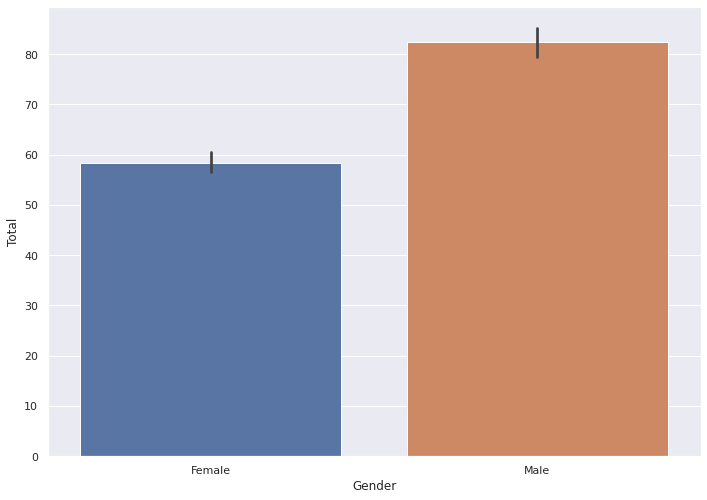

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = df['Gender'], y = df['Total'])

According to the data, we have more males committing suicide than women.

In [8]:
grp = df.groupby('State')['Total'].sum()
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total',ascending=False)


[Text(0, 0, 'Maharashtra'),
 Text(1, 0, 'West Bengal'),
 Text(2, 0, 'Andhra Pradesh'),
 Text(3, 0, 'Tamil Nadu'),
 Text(4, 0, 'Karnataka'),
 Text(5, 0, 'Kerala'),
 Text(6, 0, 'Madhya Pradesh'),
 Text(7, 0, 'Gujarat'),
 Text(8, 0, 'Chhattisgarh'),
 Text(9, 0, 'Odisha'),
 Text(10, 0, 'Uttar Pradesh'),
 Text(11, 0, 'Rajasthan'),
 Text(12, 0, 'Assam'),
 Text(13, 0, 'Haryana'),
 Text(14, 0, 'Delhi'),
 Text(15, 0, 'Punjab'),
 Text(16, 0, 'Jharkhand'),
 Text(17, 0, 'Tripura'),
 Text(18, 0, 'Bihar'),
 Text(19, 0, 'Puducherry'),
 Text(20, 0, 'Himachal Pradesh'),
 Text(21, 0, 'Uttarakhand'),
 Text(22, 0, 'Goa'),
 Text(23, 0, 'Jammu & Kashmir'),
 Text(24, 0, 'Sikkim'),
 Text(25, 0, 'A & N Islands'),
 Text(26, 0, 'Arunachal Pradesh'),
 Text(27, 0, 'Chandigarh'),
 Text(28, 0, 'Meghalaya'),
 Text(29, 0, 'Mizoram'),
 Text(30, 0, 'D & N Haveli'),
 Text(31, 0, 'Manipur'),
 Text(32, 0, 'Nagaland'),
 Text(33, 0, 'Daman & Diu'),
 Text(34, 0, 'Lakshadweep')]

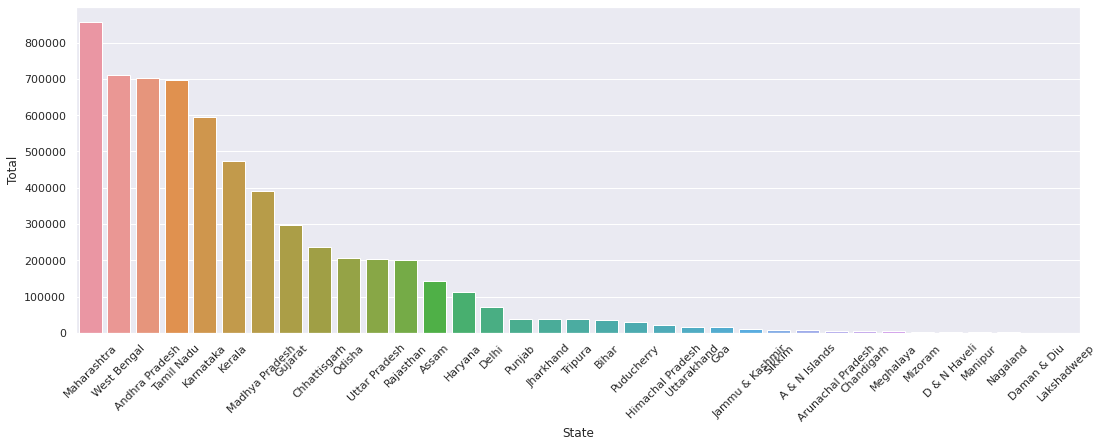

In [9]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = 'State', y = 'Total',data = total_suicides)
g.set_xticklabels(g.get_xticklabels(),rotation=45)


The states with highest number of suicides are Maharashtra, West Bengal, Andhra Pradesh, Tamil Nadu and Karnataka

In [10]:
grp_yr = df.groupby('Year')['Total'].sum()
year = pd.DataFrame(grp_yr).reset_index().sort_values('Year',ascending=False)


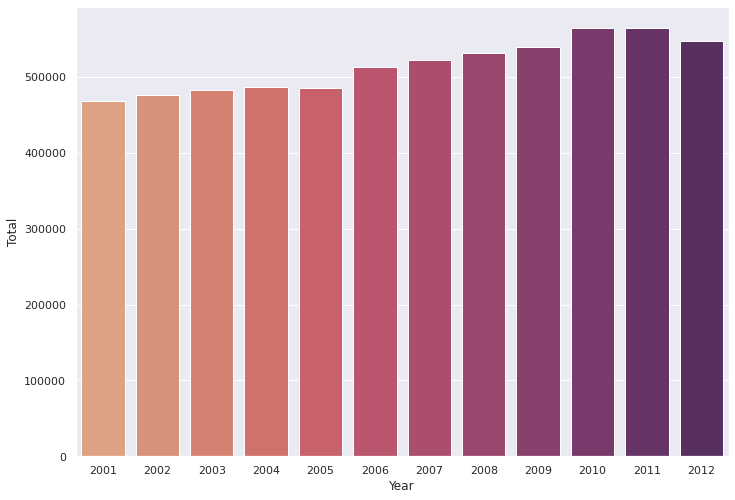

In [11]:
g = sns.barplot(x='Year',y='Total',data=year,palette = 'flare')

We see a gradual increase in the number of suicides every year, however in 2012 we have a dip compared to 2011

Exploring the type code feature

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Type_code', ylabel='count'>

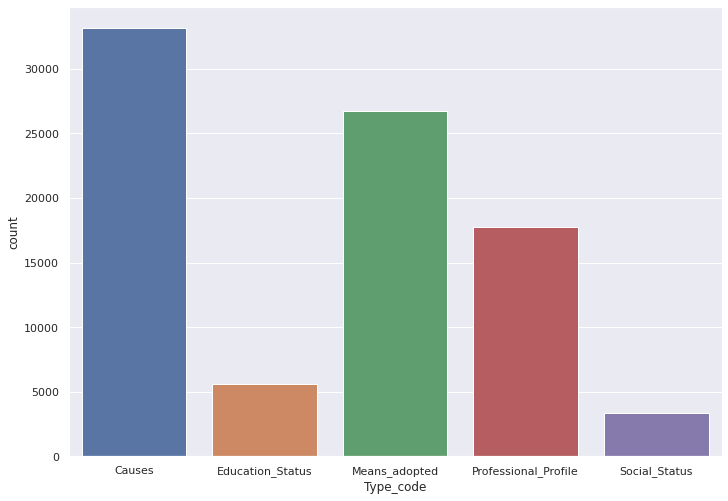

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df['Type_code'])

The type code gives us information on the basis of


a) Suicide causes
b) Education status
c) By means adopted
d) Professional profile
e) Social status

Let's explore each of them one by one

In [13]:
df_by_code = df[df['Type_code'] == 'Social_Status']
df_by_code['Type'].unique()

array(['Married', 'Never Married', 'Divorcee', 'Widowed/Widower',
       'Seperated'], dtype=object)

Total people who have their social status mentioned in the data 3349


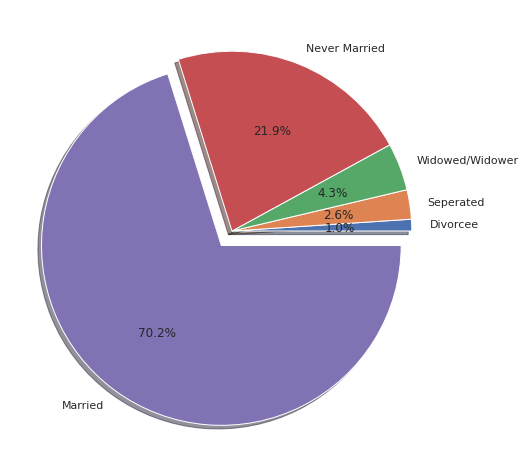

In [14]:

df_by_social = df_by_code.groupby('Type')['Total'].sum()
df_by_social_type = pd.DataFrame(df_by_social).reset_index().sort_values('Total')
print('Total people who have their social status mentioned in the data {}'.format(df_by_code.shape[0]))
labels = df_by_social_type['Type']
explode = (0,0,0,0,0.1)
plt.pie(df_by_social_type['Total'],labels = labels,autopct='%1.1f%%',explode = explode,shadow=True)
plt.show()

Of the 3349 people who have suicided, 70.2%(highest) of them were married and 1%(lowest) were divorced.

In [15]:
df_by_code = df[df['Type_code'] == 'Professional_Profile']
df_by_code['Type'].unique()

array(['Student', 'House Wife', 'Service (Private)',
       'Public Sector Undertaking', 'Service (Government)',
       'Farming/Agriculture Activity', 'Retired Person',
       'Self-employed (Business activity)', 'Unemployed',
       'Professional Activity'], dtype=object)

Total people who have their professional mentioned in the data 17782


<AxesSubplot:xlabel='Total', ylabel='Type'>

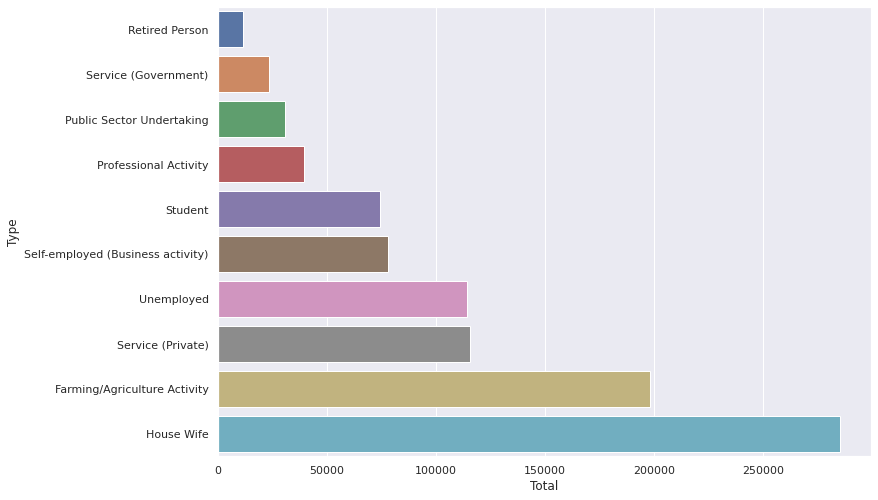

In [16]:
df_by_proffession = df_by_code.groupby('Type')['Total'].sum()
df_by_proffession_type = pd.DataFrame(df_by_proffession).reset_index().sort_values('Total')

print('Total people who have their professional mentioned in the data {}'.format(df_by_code.shape[0]))
sns.barplot(x = df_by_proffession_type['Total'], y = df_by_proffession_type['Type'])

Out of the 17782 people whose profession is known to us through the data housewives, farming, private service employees are the majority of people to suicide.

In [17]:
df_by_code = df[df['Type_code'] == 'Means_adopted']
df_by_code['Type'].unique()

array(['By Hanging', 'By Fire/Self Immolation',
       'By Consuming Other Poison', 'By Drowning',
       'By Consuming Insecticides', 'By touching electric wires',
       'By Fire-Arms', 'By Overdose of sleeping pills',
       'By coming under running vehicles/trains',
       'By Jumping off Moving Vehicles/Trains',
       'By Jumping from (Other sites)', 'By Over Alcoholism',
       'By Jumping from (Building)', 'By Self Infliction of injury',
       'By Machine'], dtype=object)

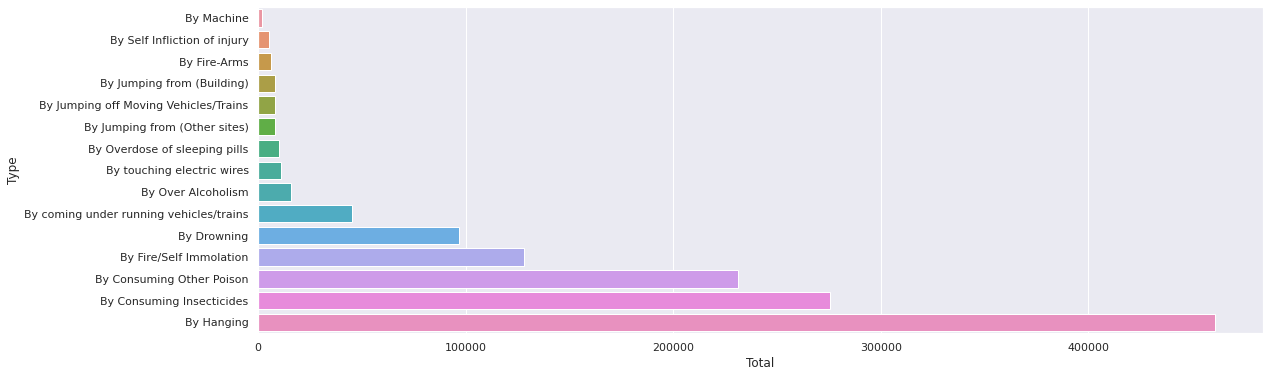

In [18]:
df_by_means = df_by_code.groupby('Type')['Total'].sum()
df_by_means_type = pd.DataFrame(df_by_means).reset_index().sort_values('Total')
fig , ax = plt.subplots(figsize=(18,6))
g = sns.barplot(x = df_by_means_type['Total'], y = df_by_means_type['Type'])


Hanging, Consuming Insecticides and poison, self immolation are the top means adopted by people who suicide.

In [19]:
df_by_code = df[df['Type_code'] == 'Education_Status']
df_by_code['Type'].unique()

array(['No Education', 'Middle', 'Primary', 'Matriculate/Secondary',
       'Graduate', 'Hr. Secondary/Intermediate/Pre-Universit',
       'Post Graduate and Above', 'Diploma'], dtype=object)

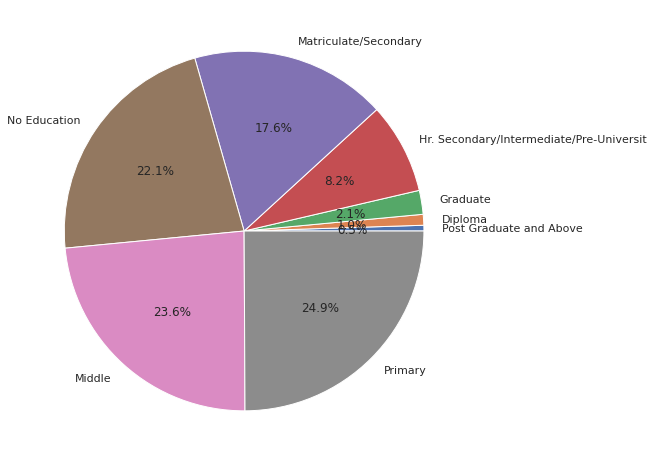

In [20]:
df_by_education = df_by_code.groupby('Type')['Total'].sum()
df_by_education_type = pd.DataFrame(df_by_education).reset_index().sort_values('Total')
#print('Total people who have their social status mentioned in the data {}'.format(df_by_code.shape[0]))
labels = df_by_education_type['Type']

plt.pie(df_by_education_type['Total'],labels = labels,autopct='%1.1f%%')
plt.show()

A trend which can be observed with higher education there can be seen a dip in the number of suicides.

In [21]:
df_by_code = df[df['Type_code'] == 'Causes']
df_by_code['Type'].unique()

array(['Love Affairs', 'Other Prolonged Illness',
       'Failure in Examination', 'Family Problems',
       'Insanity/Mental Illness', 'Death of Dear Person', 'Unemployment',
       'Fall in Social Reputation', 'Suspected/Illicit Relation',
       'Cancellation/Non-Settlement of Marriage',
       'Not having Children (Barrenness/Impotency', 'Poverty',
       'Professional/Career Problem', 'Paralysis',
       'Bankruptcy or Sudden change in Economic Status', 'Divorce',
       'Cancer', 'Property Dispute', 'Illness (Aids/STD)',
       'Physical Abuse (Rape/Incest Etc.)', 'Drug Abuse/Addiction',
       'Ideological Causes/Hero Worshipping', 'Dowry Dispute',
       'Illegitimate Pregnancy'], dtype=object)

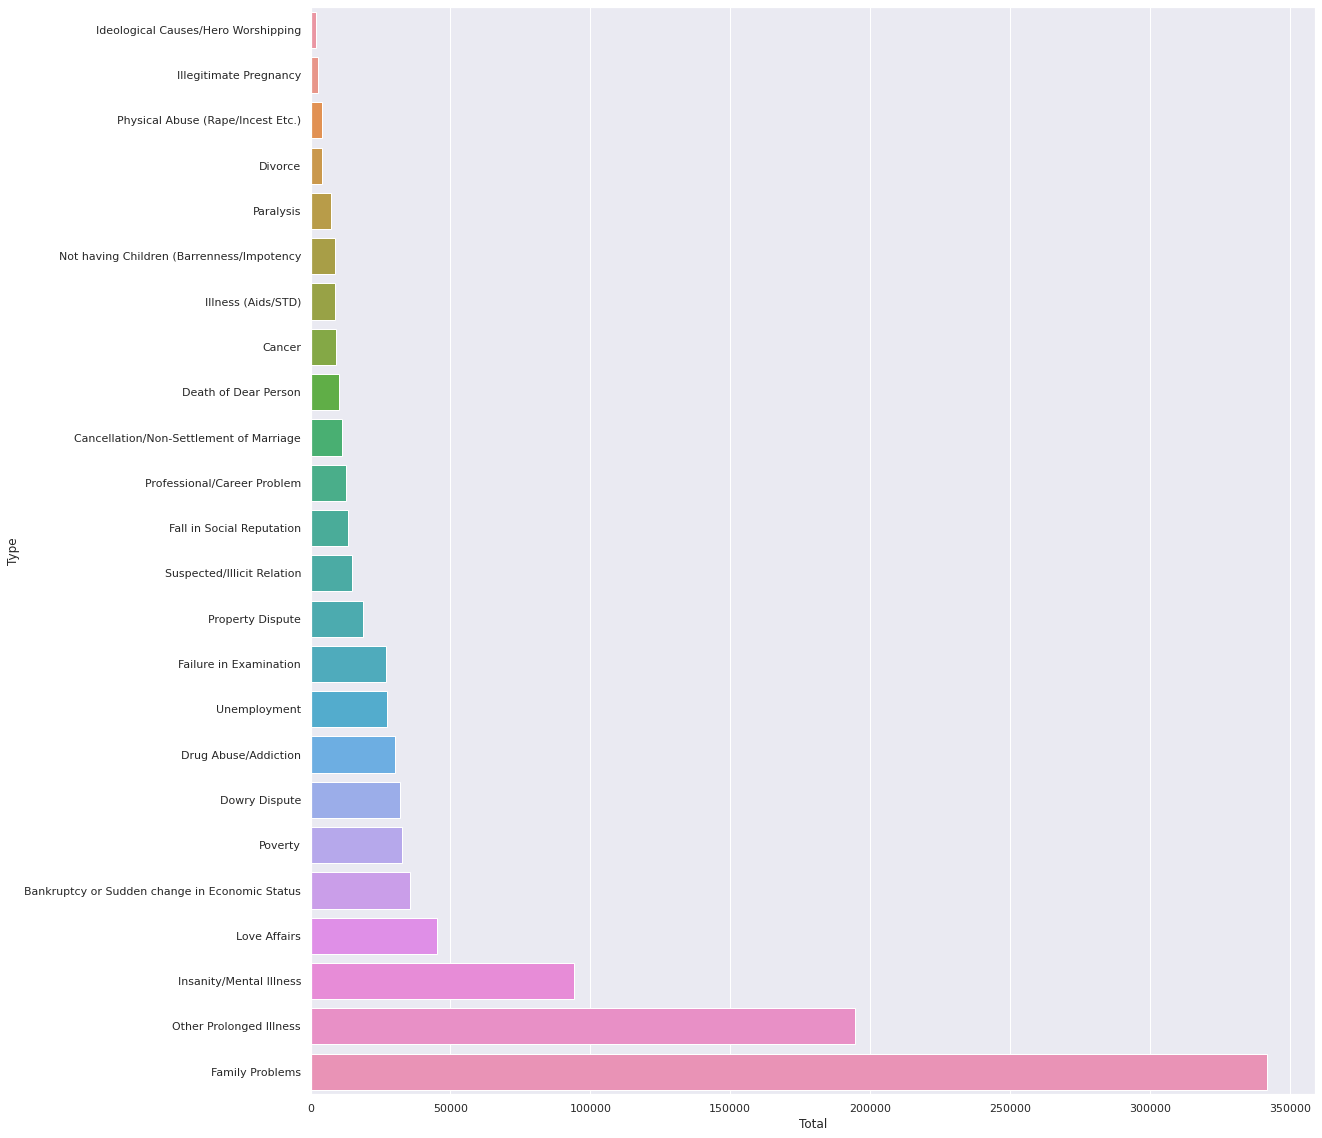

In [22]:
df_by_causes = df_by_code.groupby('Type')['Total'].sum()
df_by_causes_type = pd.DataFrame(df_by_causes).reset_index().sort_values('Total')
fig , ax = plt.subplots(figsize=(18,20))
g = sns.barplot(x = df_by_causes_type['Total'], y = df_by_causes_type['Type'])

Top causes of suicide are

1) Family Problems
2) Prolonged Illness
3) Mental Illness
4) Love affairs
5) Bankruptcy or sudden change in economic status

Thank you for reading along.

If you find the notebook useful please upvote.
